## Imports

In [6]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Model

In [7]:
model_path = "/content/drive/MyDrive/YOGA/TRAINED_MODEL/yoga-model.keras"

model = load_model(model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 164 variables whereas the saved optimizer has 326 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Prediction

### Load and Show Image

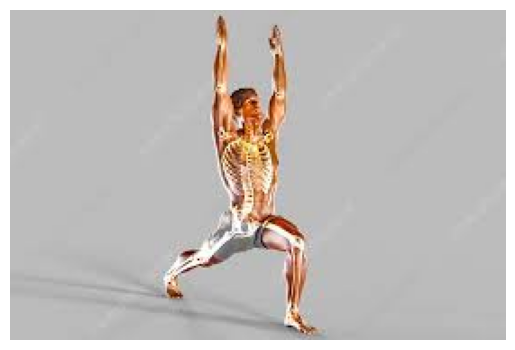

In [8]:
image_path = "download.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: Image file '{image_path}' not found.")

img = cv2.imread(image_path)


# Displaying Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

### Preprocess Image

In [9]:
img = cv2.resize(img, (256, 256))
img = img / 255.0
img = np.expand_dims(img, axis=0)

### Make Prediction

In [10]:
predictions = model.predict(img)
class_idx = np.argmax(predictions)
classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior']
print(f"Predicted Pose: {classes[class_idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Pose: warrior
